In [88]:
import re
import datetime
date_re = '\d{1, 2}\.{\d{1, 2}}'
path = '/Users/yetongxue/Downloads/log.txt'

text_arr = []
with open(path, 'r') as f:
    for i in f.readlines():
        if len(i)<=1:
            continue
        regMatch = reg.match(i)
        if not regMatch:
            continue
        match_dict = regMatch.groupdict()
        date = match_dict['date']
        date_fmt = datetime.datetime.strptime('2020.'+ date, '%Y.%m.%d')
        text = re.sub(date, '', i, flags=re.MULTILINE)
        text = re.sub('https://[\w\?\-\&\#\.\/=]+', '', text, flags=re.MULTILINE)
        text = re.sub('\s|、|\n|[\-\d+]+', '', text, flags=re.MULTILINE)
        if not text:
            continue
        text_arr.append({'date': date_fmt, 'content': text})
text_arr = text_arr[::-1]

In [115]:
import pandas as pd
df = pd.DataFrame(text_arr)
df

,date,content
0,2020-01-03,回源模式下，支持控制面板设置
1,2020-01-06,创宇盾屏蔽时间特殊处理
2,2020-01-07,屏蔽时间修改
3,2020-01-08,导出指定域名下子域名信息
4,2020-01-09,查询ip存在哪些ip黑白名单中
...,...,...
198,2020-12-15,协同防御
199,2020-12-17,缓存刷新日志问题
200,2020-12-18,tls子域名导出
201,2020-12-21,净网盾隐私盾报表下载


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
matplotlib.rcParams['font.family'] = 'SimHei'

dates = df['date'].dt.strftime('%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(list(df['content']), dates)
ax.set(xlabel='日期', ylabel='需求名称', title='每月需求数量概览')
ax.grid()
# plt.show()

NameError: name 'df' is not defined

In [120]:
m_group = df.groupby(df['date'].apply(lambda x: x.month)).count()
m_group

,date,content
date,,
1,11,11
2,8,8
3,22,22
4,22,22
5,18,18
6,21,21
7,21,21
8,16,16
9,20,20


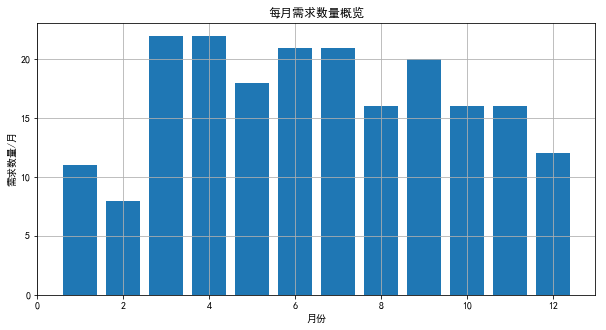

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(list(m_group.index), list(m_group['content']))
ax.set(xlabel='月份', ylabel='需求数量/月', title='每月需求数量概览')
ax.grid()
plt.show()

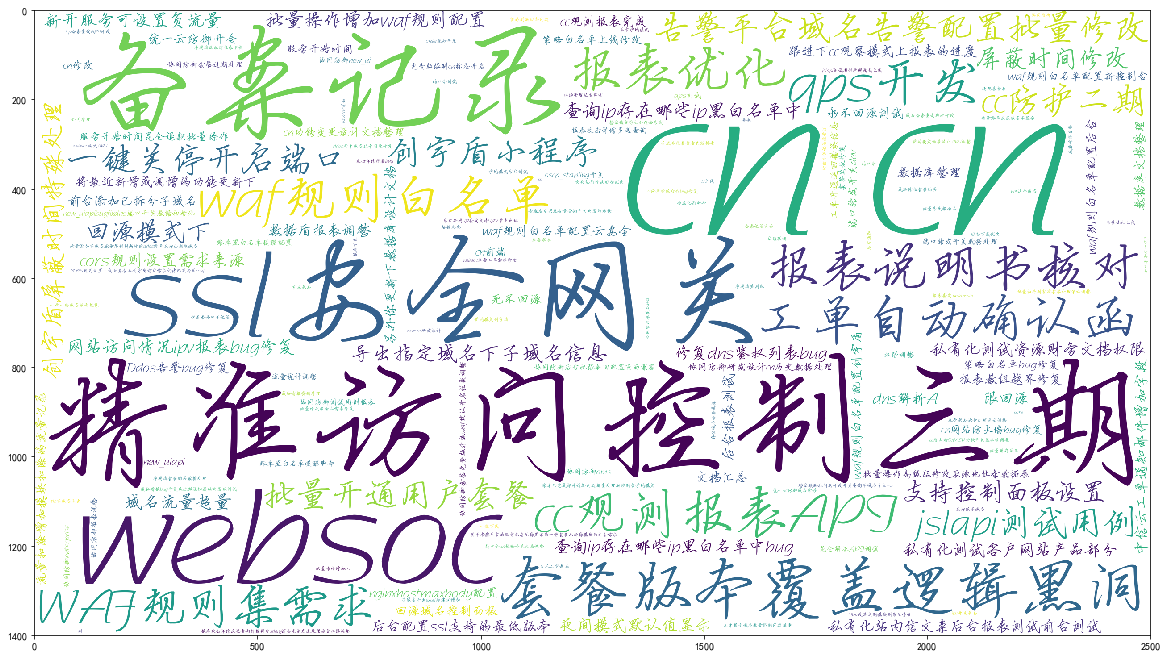

In [159]:
import wordcloud

w = wordcloud.WordCloud(width=2500,height=1400,background_color='white',font_path='/Library/Fonts/方正硬笔行书简体.ttf')
text = '、'.join(list(df['content']))
w.generate(text)
path = 'word_cloud.png'
w.to_file(path)
img=mpimg.imread(path)
fig, ax = plt.subplots(figsize=(20,12))
imgplot=plt.imshow(img)
plt.show()